In [4]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
def isConflictSerializable(input):
    input = input.replace("(", "").replace(")", "").replace(" ", "")
    if ";" in input[-1]:
        input = input[:-1]
    shedule = input.split(";")
    shedule = commitClean(shedule)
    conflicts = []
    G = nx.DiGraph()
    
    for index, value in enumerate(shedule):
        num = value[1]
        element = value[2]
        for n in shedule[index:]:
            if ("w" in n or "w" in value) and num != n[1] and element == n[2]:
                conflict = (num, n[1])
                conflicts.append(conflict)
                
    conflicts = list(set(conflicts))
    
    G.add_edges_from(conflicts)
    nx.draw(G, with_labels = True)
    plt.show()
    print("Shedule used:\n", shedule)
    print()
    
    try:
        nx.find_cycle(G, orientation="original")
        print("Historien er IKKE konfliktserialiserbar!")
        
    except nx.exception.NetworkXNoCycle:
        print("Historien ER konfliktserialiserbar!")
    
    print("--------------------------------------------------------------")
    
    
def commitClean(arr):
    newArr = []
    for i in arr:
        if "c" not in i:
            newArr.append(i)
    return newArr

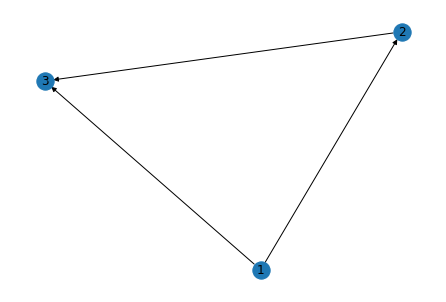

Shedule used:
 ['w2Y', 'r3Y', 'r1Z', 'w2Z', 'w3Z', 'w2X']

Historien ER konfliktserialiserbar!
--------------------------------------------------------------


In [11]:
#SKRIV HISTORIE HER

historie = "w2(Y); r3(Y); r1(Z); w2(Z); w3(Z); w2(X);"

isConflictSerializable(historie)

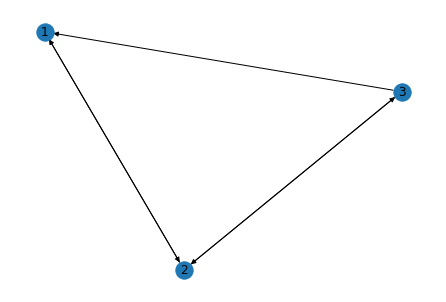

Shedule used:
 ['r3X', 'w1X', 'r2Z', 'w2X', 'r3Z', 'w3Z', 'r1X']

Historien er IKKE konfliktserialiserbar!
--------------------------------------------------------------


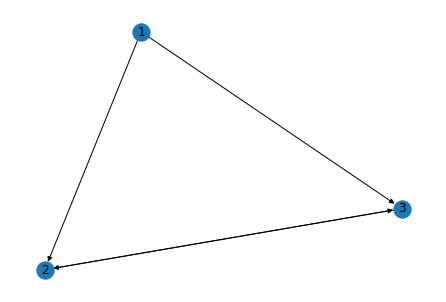

Shedule used:
 ['r1X', 'w1X', 'r2Y', 'w3Y', 'r3X', 'w3Z', 'w2X']

Historien er IKKE konfliktserialiserbar!
--------------------------------------------------------------


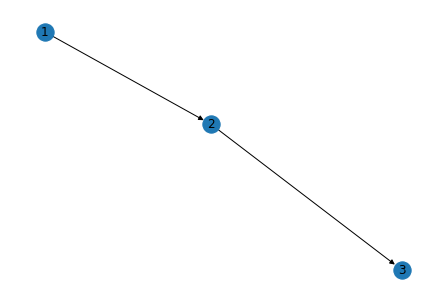

Shedule used:
 ['r2X', 'r1X', 'w2X', 'r3X', 'r2Z', 'w3Z', 'r1Y']

Historien ER konfliktserialiserbar!
--------------------------------------------------------------


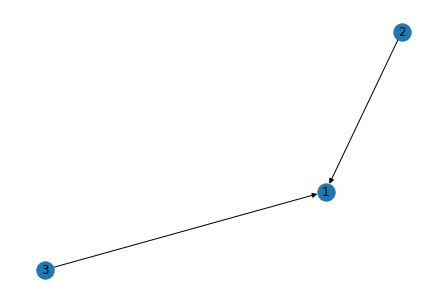

Shedule used:
 ['w2X', 'w3Y', 'r3Y', 'r1X', 'r2X', 'r1Y', 'w1Y']

Historien ER konfliktserialiserbar!
--------------------------------------------------------------


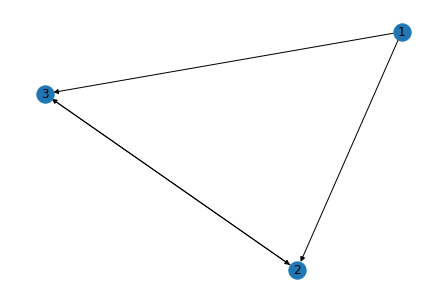

Shedule used:
 ['r1X', 'r1Y', 'w1X', 'w2Y', 'w3Y', 'w1X', 'r2Y']

Historien er IKKE konfliktserialiserbar!
--------------------------------------------------------------


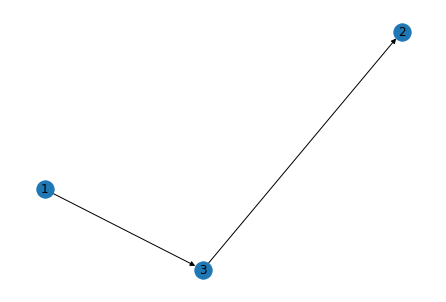

Shedule used:
 ['r1X', 'w1X', 'r2Y', 'w2Y', 'r3X', 'w3Z', 'r2Z']

Historien ER konfliktserialiserbar!
--------------------------------------------------------------


In [8]:
# SKRIV FLERE HISTORIER

historier = ["r3(X); w1(X); r2(Z); w2(X); r3(Z); w3(Z); r1(X);", "r1(X); w1(X); r2(Y); w3(Y); r3(X); w3(Z); w2(X);"
        , "r2(X); r1(X); w2(X); r3(X); r2(Z); w3(Z); r1(Y);", "w2(X); w3(Y); r3(Y); r1(X); r2(X); r1(Y); w1(Y);"
        , "r1(X); r1(Y); w1(X); w2(Y); w3(Y); w1(X); r2(Y);", "r1(X); w1(X); r2(Y); w2(Y); r3(X); w3(Z); r2(Z);"]

for h in historier:
    isConflictSerializable(h)